In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Seu dataframe original
df = pd.read_csv("../dataset.csv")

# Selecionando apenas as colunas relevantes
df_selected = df[['popularity', 'danceability', 'loudness', 'acousticness', 'valence', 
                  'duration_ms', 'energy', 'key', 'speechiness', 'instrumentalness', 
                  'tempo', 'time_signature', 'mode']]

# Normalizando os dados
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_selected)

# Aplicando PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_normalized)

# Criando um novo dataframe com as componentes principais
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Concatenando com outras colunas, se necessário
#df_final = pd.concat([df[['track_id', 'artists', 'album_name', 'track_name', 'track_genre']], df_pca], axis=1)

df_final = df_pca

df_pca


,PC1,PC2
0,-0.700828,-1.019852
1,3.236395,-1.511941
2,1.360309,0.022662
3,3.779745,0.202902
4,0.872328,-0.393627
...,...,...
113995,3.384534,2.213918
113996,4.970211,1.758212
113997,1.003026,-1.349238
113998,0.446848,-0.072741


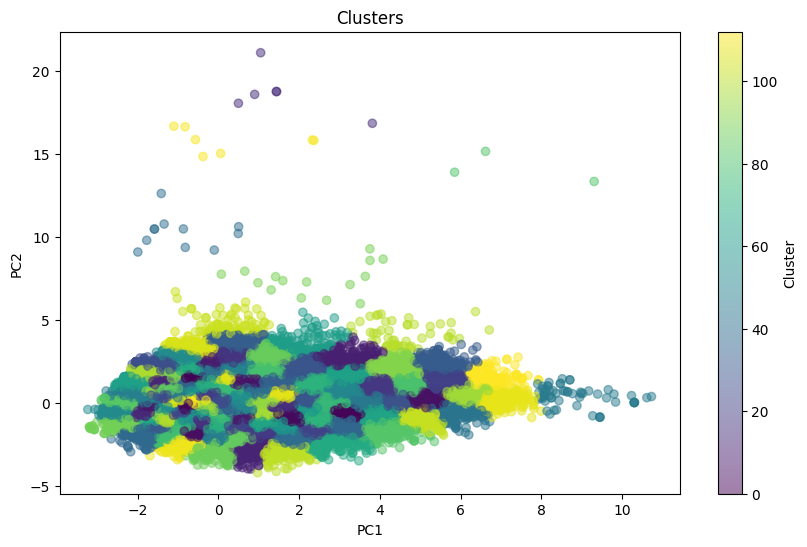

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Aplicando o algoritmo K-Means
kmeans = KMeans(n_clusters=113, random_state=42)
clusters = kmeans.fit_predict(df_pca)

# Adicionando os clusters ao dataframe final
df_final['cluster'] = clusters

# Visualizando os clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_final['PC1'], df_final['PC2'], c=df_final['cluster'], cmap='viridis', alpha=0.5)
plt.title('Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()


Todo: fazer um seletor para selecionar alguns generos e fazer o cluster com eles